# Analyse


## importation

In [59]:
# importation of the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score


In [60]:
#importation of the dataset
dataset = pd.read_csv('merged_data.csv')

In [61]:
dataset.head(5)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
0,Afghanistan,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000
1,Afrique du Sud,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755
2,Albanie,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485
3,Algérie,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035
4,Allemagne,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420


In [62]:
# check for value = 0
dataset[dataset == 0].count()


Zone                                             0
Disponibilité intérieure_dispo                   2
Exportations - Quantité_dispo                   89
Importations - Quantité_dispo                   21
Nourriture_dispo                                 2
Pertes_dispo                                   116
Production_dispo                                12
Valeur_population                                0
Exportations - quantité_import                  75
Exportations - valeur_import                    78
Importations - quantité_import                  12
Importations - valeur_import                    12
Valeur_pib                                       3
Outlets_kfc                                     69
Viande poids vif, poulet, totale_production     88
dtype: int64

## Analyse dataset


In [63]:
#transformation en array numpy
dataset.set_index('Zone', inplace=True)
X = dataset.values
X.shape

(172, 14)

In [64]:
# preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [65]:
#new dataframe with the scaled values
df_scaled = pd.DataFrame( X_scaled, columns=dataset.columns, index=dataset.index)
df_scaled

,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
Zone,,,,,,,,,,,,,,
Afghanistan,-0.287007,-0.227157,-0.321067,-0.280513,-0.192502,-0.275742,-0.042889,-0.262225,-0.215874,0.517105,0.675786,-0.236585,-0.343623,-0.733341
Afrique du Sud,0.663078,-0.089221,2.296542,0.653889,0.848622,0.388559,0.092833,-0.065617,-0.074806,-0.310261,-0.094335,-0.040670,4.858061,0.447184
Albanie,-0.291617,-0.227157,-0.272492,-0.284288,-0.218209,-0.281822,-0.261814,-0.262225,-0.215874,-0.124279,-0.263137,-0.239842,-0.283708,0.713507
Algérie,-0.185591,-0.227157,-0.466789,-0.181881,-0.051115,-0.175631,-0.009518,-0.262225,-0.215874,-0.319260,0.382345,-0.154789,-0.332729,0.544199
Allemagne,0.488365,1.187237,4.066801,0.452851,-0.218209,0.326547,0.260891,10.341404,11.333612,7.942644,7.526523,1.751611,0.832884,0.677595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.123358,-0.021347,1.859374,-0.112037,-0.218209,-0.267636,-0.218549,-0.252540,-0.198011,-0.283400,-0.302762,-0.035437,0.478842,-0.733341
Équateur,-0.156088,-0.227157,-0.477583,-0.153566,0.000299,-0.149286,-0.170729,-0.262225,-0.215874,-0.192301,0.274144,-0.190418,-0.343623,0.282095
États-Unis d'Amérique,8.107025,7.856348,0.186264,8.235288,-0.218209,8.594853,1.849341,1.959452,3.140760,-0.110915,-0.045837,10.372571,-0.343623,-0.029455


In [66]:
# clustering hierarchique
Z = linkage(X_scaled, method='ward', metric='euclidean')

In [67]:
# Z is your linkage matrix from hierarchical clustering.
# The third column (index 2) contains the merge distances.
merge_distances = Z[:, 2]

# Compute differences between successive merge distances
diffs = np.diff(merge_distances)

# Identify the index where the gap is the largest
max_gap_index = np.argmax(diffs) + 1  # +1 to get the corresponding merge

# Choose the threshold as the merge distance where the gap occurs
calculated_threshold = merge_distances[max_gap_index]
print("Calculated threshold:", calculated_threshold)


Calculated threshold: 38.11008164152642


In [68]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of candidate thresholds:
thresholds = np.linspace(merge_distances.min(), merge_distances.max(), 50)
best_score = -1
optimal_threshold = None

# Assume 'dataset' is your original data array (with appropriate scaling/preprocessing)
for t in thresholds:
    # Get cluster labels for each threshold
    labels = fcluster(Z, t, criterion='distance')
    
    # Compute silhouette score only if we have more than one cluster
    if len(np.unique(labels)) > 1:
        score = silhouette_score(dataset, labels)
        if score > best_score:
            best_score = score
            optimal_threshold = t

print("Optimal threshold based on silhouette score:", optimal_threshold)

Optimal threshold based on silhouette score: 29.55518410125274


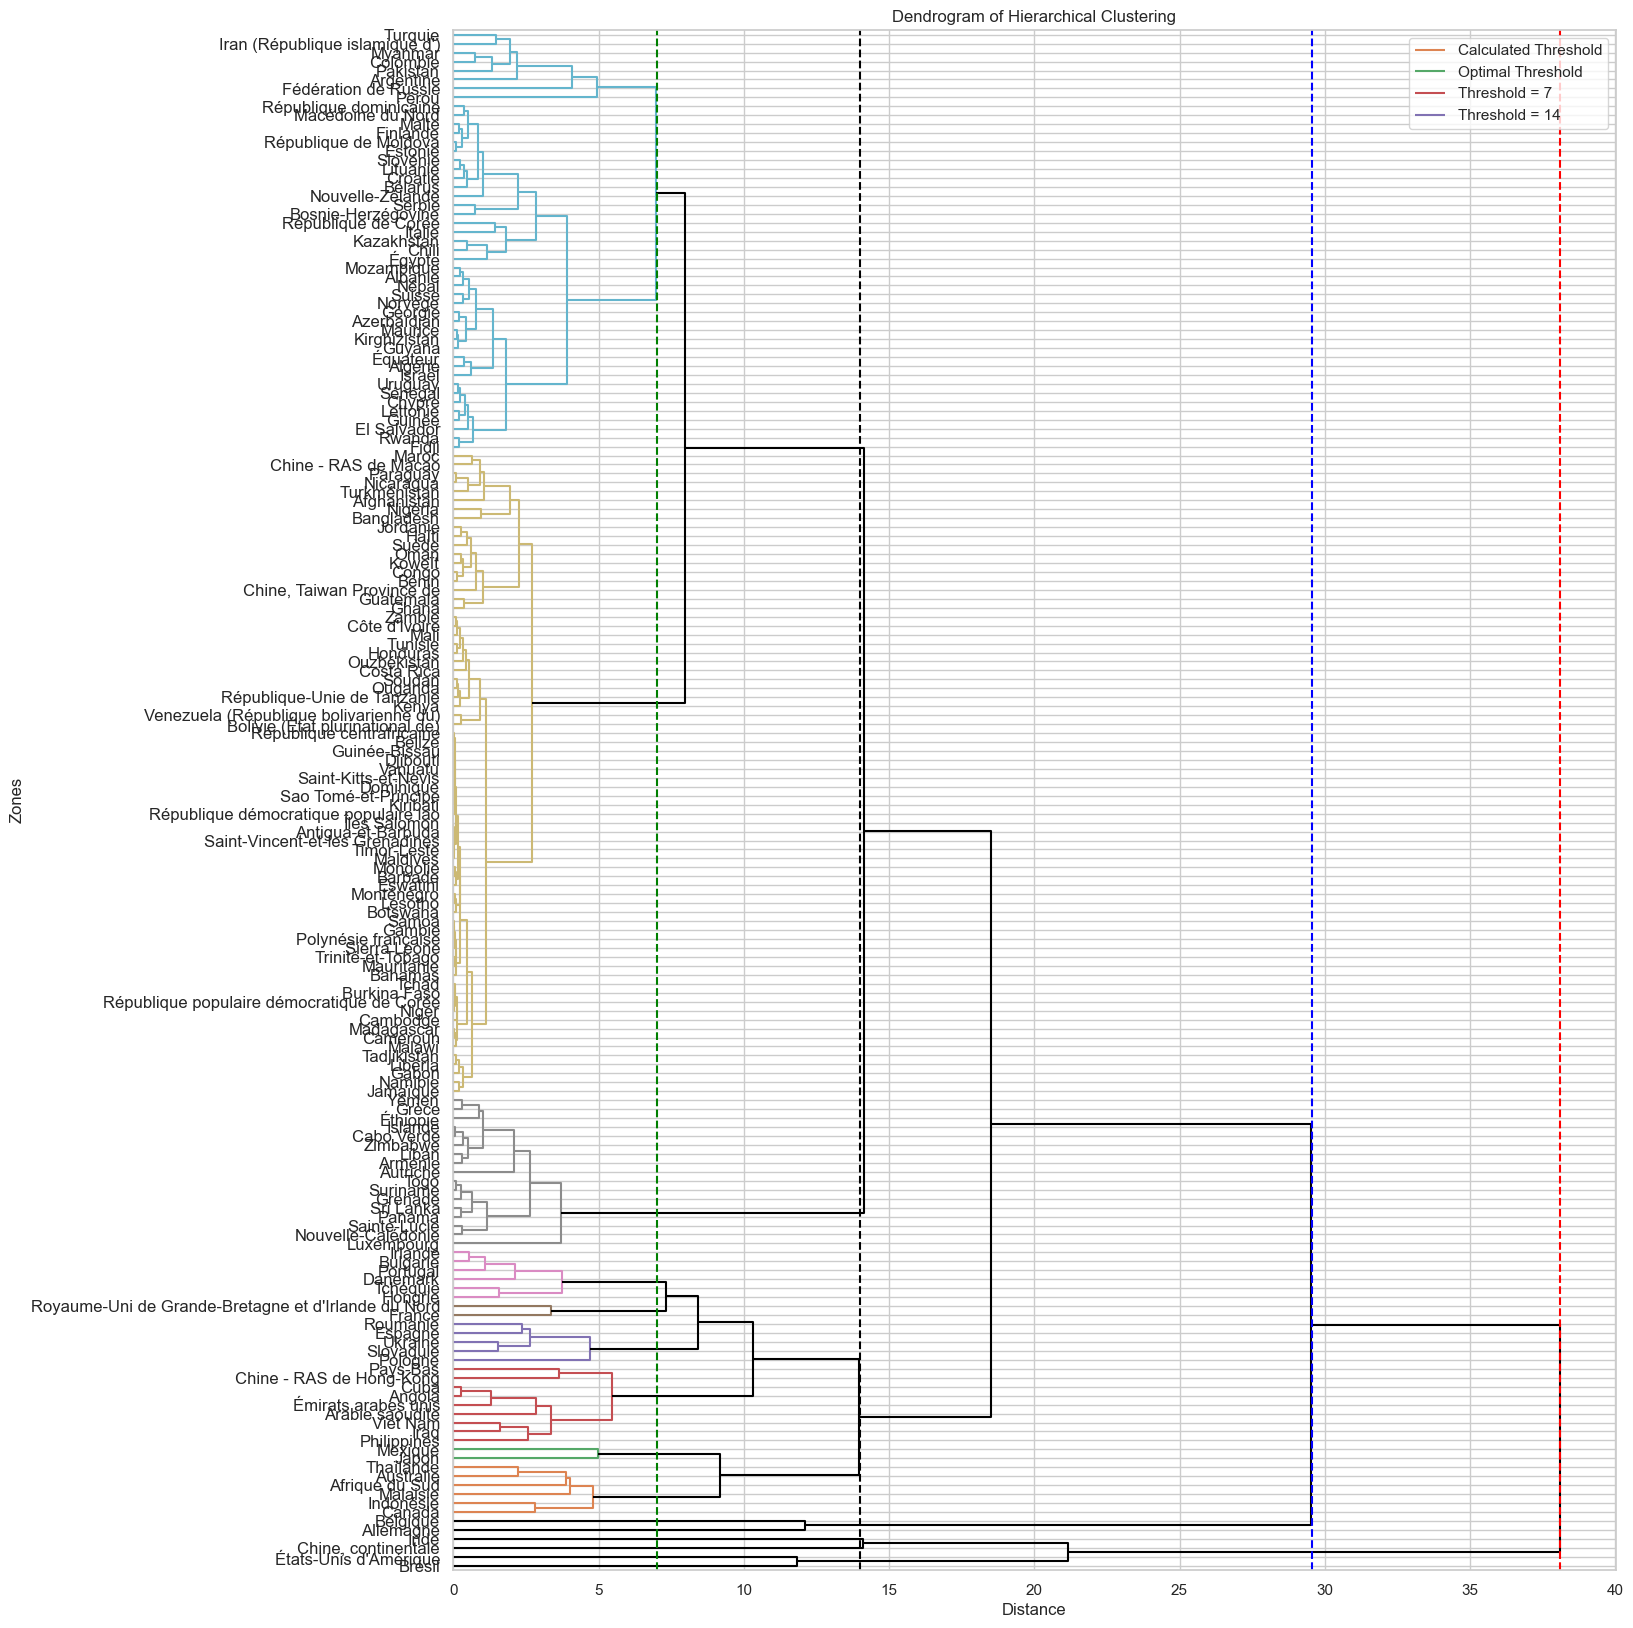

In [69]:
plt.figure(figsize=(15, 20))  # swap dimensions to suit the rotated layout
dendrogram(
    Z,
    orientation="right",              # rotate the dendrogram
    labels=dataset.index,
    leaf_font_size=12,
    color_threshold=7,
    above_threshold_color='black'
)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Distance')  # now the distance is on the x-axis
plt.ylabel('Zones')

# Draw a vertical line at distance=7 to indicate the cutoff for clusters
plt.axvline(x=calculated_threshold, color='red', linestyle='--')
plt.axvline(x=optimal_threshold, color='blue', linestyle='--')
plt.axvline(x=7, color='green', linestyle='--')
plt.axvline(x=14, color='black', linestyle='--')
plt.legend(['Calculated Threshold', 'Optimal Threshold', 'Threshold = 7', 'Threshold = 14'], loc='upper right')


plt.show()

C:\Users\ruben\AppData\Local\Temp\ipykernel_16688\659578353.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


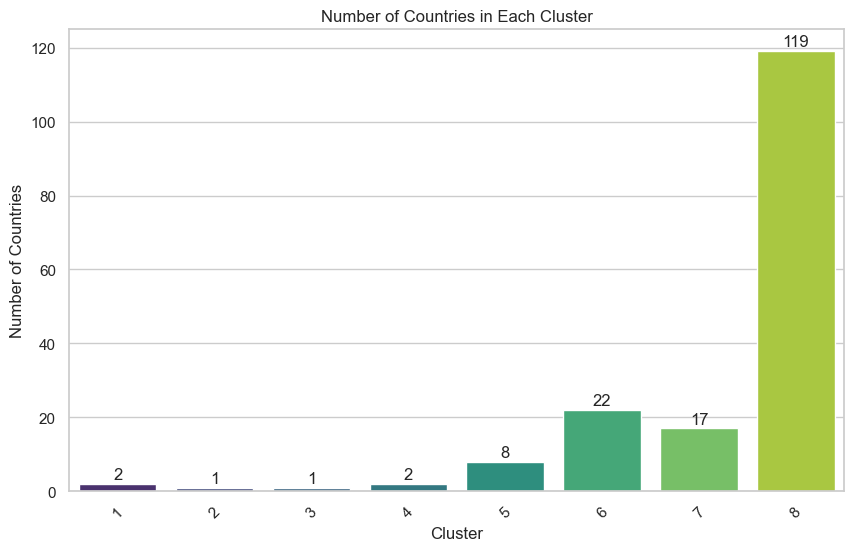

In [70]:
# plot dendrogram with 8 clusters & number of countries in each cluster
nb_clusters = 8
clusters = fcluster(Z, nb_clusters, criterion='maxclust')
# Create a DataFrame to hold the cluster labels
cluster_labels = pd.DataFrame({'Zone': dataset.index, 'Cluster': clusters})
# Count the number of countries in each cluster
cluster_counts = cluster_labels['Cluster'].value_counts().sort_index()
# Plot the number of countries in each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Countries in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
#show the number of countries in each cluster
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.show()


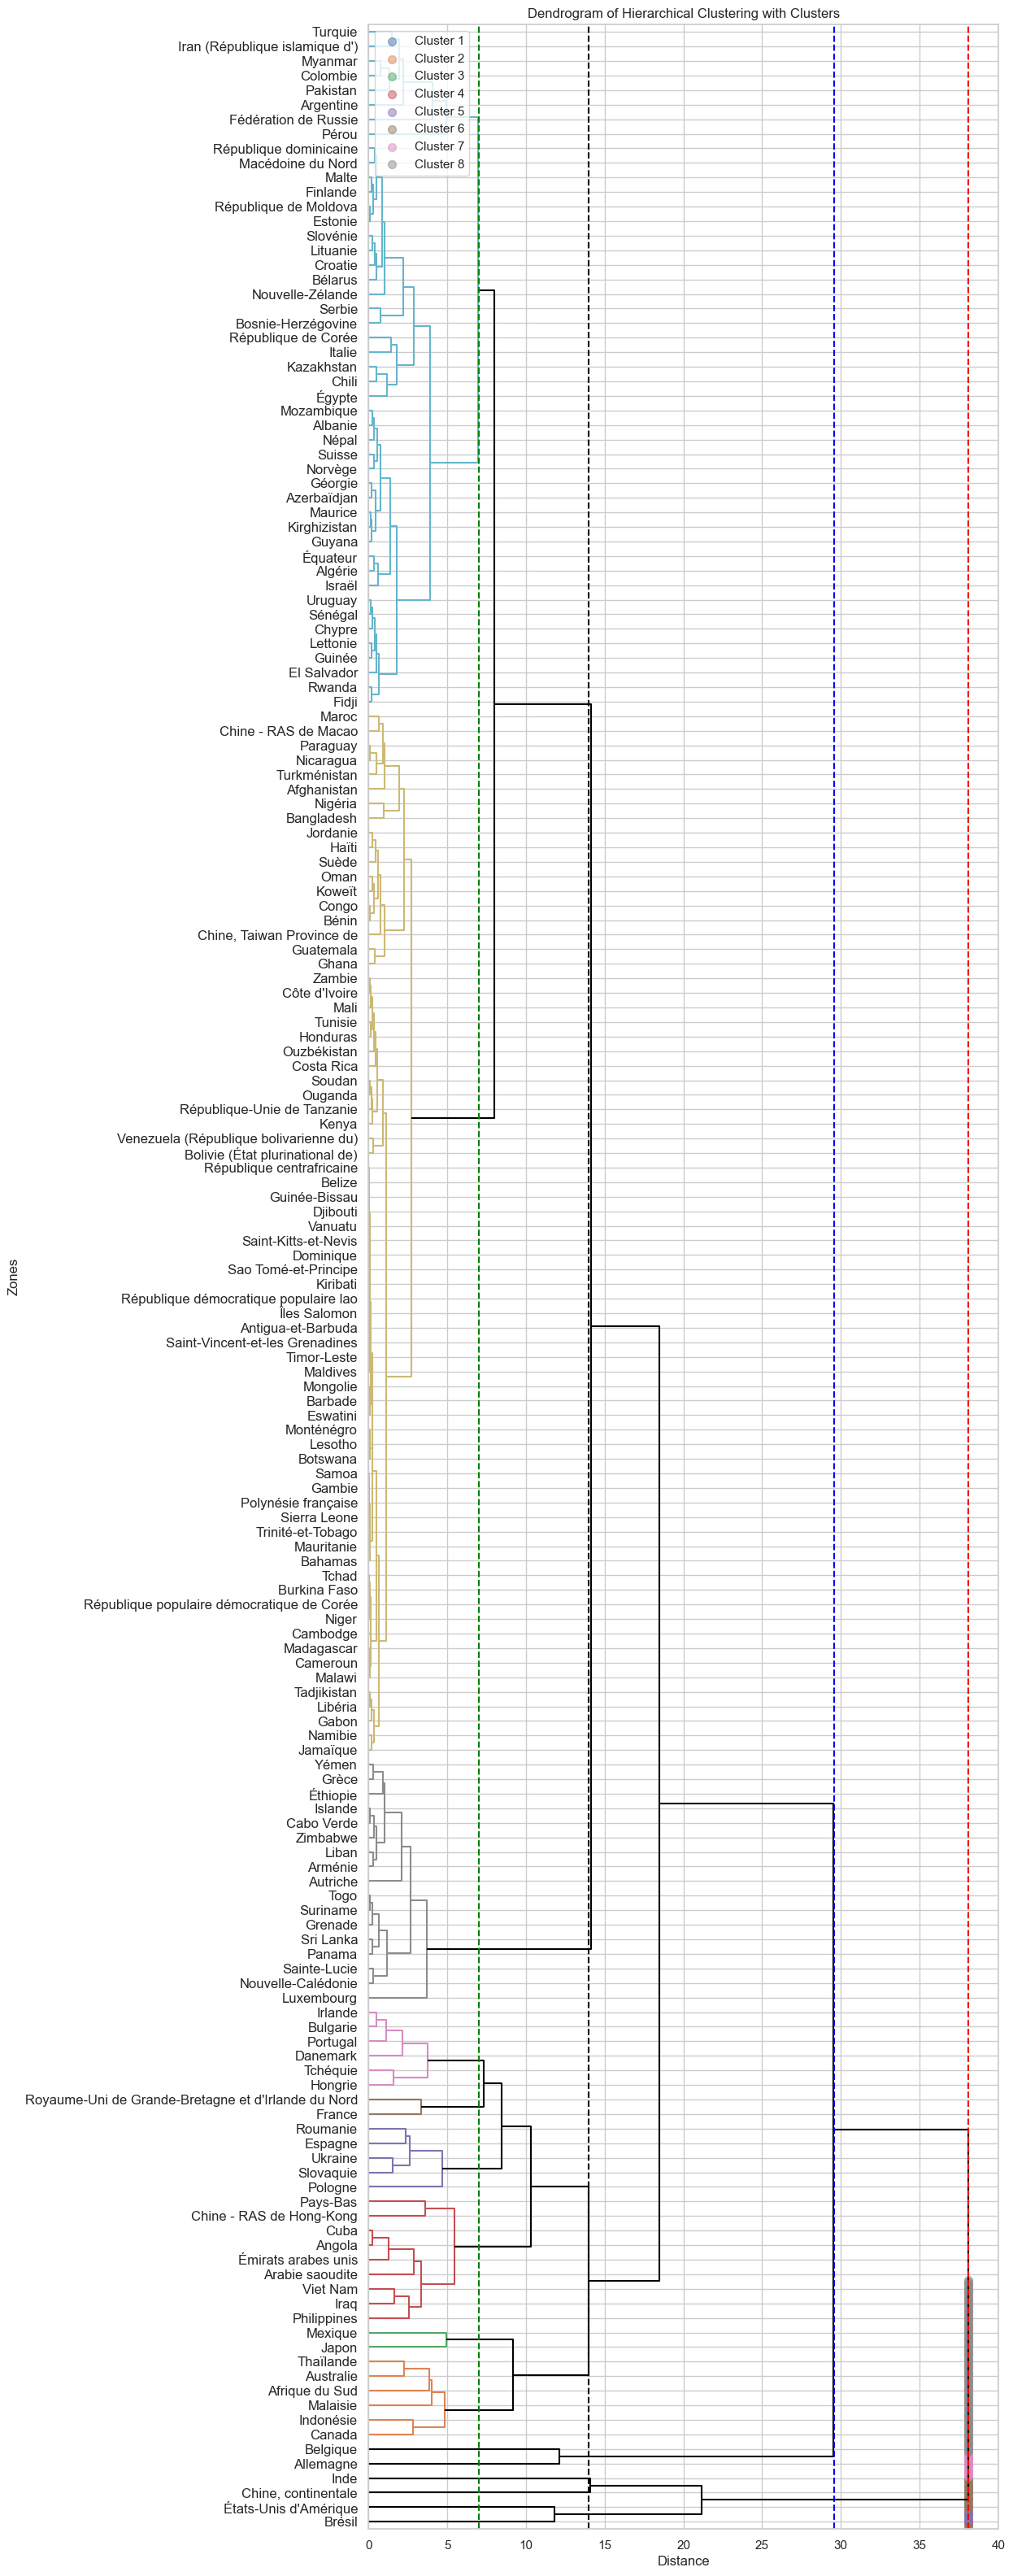

In [71]:
#show the clusters on the dendrogram
plt.figure(figsize=(10, 40))  # swap dimensions to suit the rotated layout
dendrogram(
    Z,
    orientation="right",              # rotate the dendrogram
    labels=dataset.index,
    leaf_font_size=12,
    color_threshold=7,
    above_threshold_color='black',
    
)
plt.title('Dendrogram of Hierarchical Clustering with Clusters')
plt.xlabel('Distance')  # now the distance is on the x-axis
plt.ylabel('Zones')
# Draw a vertical line at distance=7 to indicate the cutoff for clusters
plt.axvline(x=calculated_threshold, color='red', linestyle='--')
plt.axvline(x=optimal_threshold, color='blue', linestyle='--')
plt.axvline(x=7, color='green', linestyle='--')

plt.axvline(x=14, color='black', linestyle='--')
plt.legend(['Calculated Threshold', 'Optimal Threshold', 'Threshold = 7', 'Threshold = 14'], loc='upper right')
# Color the clusters
for i, cluster in enumerate(np.unique(clusters)):
    plt.scatter([calculated_threshold] * (clusters == cluster).sum(), dataset.index[clusters == cluster], label=f'Cluster {cluster}', s=50, alpha=0.5)
plt.legend()
plt.show()



In [72]:
# show countries in each cluster
for cluster in np.unique(clusters):
    print(f"Cluster {cluster}:")
    print(dataset.index[clusters == cluster].tolist())
    print("\n")
    

Cluster 1:
['Brésil', "États-Unis d'Amérique"]


Cluster 2:
['Chine, continentale']


Cluster 3:
['Inde']


Cluster 4:
['Allemagne', 'Belgique']


Cluster 5:
['Afrique du Sud', 'Australie', 'Canada', 'Indonésie', 'Japon', 'Malaisie', 'Mexique', 'Thaïlande']


Cluster 6:
['Angola', 'Arabie saoudite', 'Bulgarie', 'Chine - RAS de Hong-Kong', 'Cuba', 'Danemark', 'Espagne', 'France', 'Hongrie', 'Iraq', 'Irlande', 'Pays-Bas', 'Philippines', 'Pologne', 'Portugal', 'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Slovaquie', 'Tchéquie', 'Ukraine', 'Viet Nam', 'Émirats arabes unis']


Cluster 7:
['Arménie', 'Autriche', 'Cabo Verde', 'Grenade', 'Grèce', 'Islande', 'Liban', 'Luxembourg', 'Nouvelle-Calédonie', 'Panama', 'Sainte-Lucie', 'Sri Lanka', 'Suriname', 'Togo', 'Yémen', 'Zimbabwe', 'Éthiopie']


Cluster 8:
['Afghanistan', 'Albanie', 'Algérie', 'Antigua-et-Barbuda', 'Argentine', 'Azerbaïdjan', 'Bahamas', 'Bangladesh', 'Barbade', 'Belize', 'Bolivie (État plurinational de)',

In [73]:
# add cluster labels to the original dataset
dataset['Cluster'] = clusters


In [74]:
#show avarage values of each cluster
average_values = dataset.groupby('Cluster').mean()
print("Average values of each cluster:")
print(average_values)

Average values of each cluster:
         Disponibilité intérieure_dispo  Exportations - Quantité_dispo  \
Cluster                                                                  
1                          1.412400e+10                   3.957500e+09   
2                          1.816100e+10                   5.760000e+08   
3                          3.661000e+09                   4.000000e+06   
4                          9.455000e+08                   6.510000e+08   
5                          2.022625e+09                   1.408750e+08   
6                          7.122273e+08                   2.372727e+08   
7                          7.829412e+07                   7.000000e+06   
8                          2.667983e+08                   1.329412e+07   

         Importations - Quantité_dispo  Nourriture_dispo  Pertes_dispo  \
Cluster                                                                  
1                         6.300000e+07      1.404100e+10  0.000000e+00   
2    

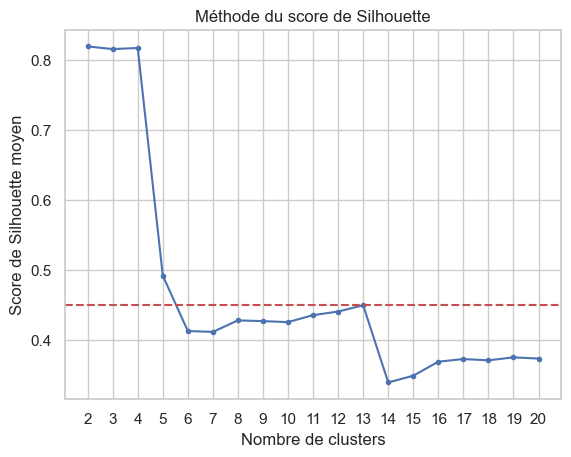

In [75]:
# Initialise les variables
n_clusters_range = range(2, 21)
silhouette_avg_scores = []

# Calcule le score de Silhouette moyen pour chaque valeur du nombre de clusters
for n_clusters in n_clusters_range:
    clustering = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clustering)
    silhouette_avg_scores.append(silhouette_avg)

# Trace le graphique
fig, ax = plt.subplots()

plt.plot(n_clusters_range, silhouette_avg_scores, marker='.')
plt.axhline(y=silhouette_avg_scores[11], linestyle = '--', color='r')

# Définit la position des graduations
ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Score de Silhouette moyen')
ax.set_title('Méthode du score de Silhouette')

plt.show()

del (n_clusters_range, silhouette_avg_scores, n_clusters, clustering,
     silhouette_avg, fig, ax)

In [76]:
# identification des clusters
clusters = fcluster(Z, t=13, criterion='maxclust')
# affichage des pays selon les clusters
df_clusters = pd.DataFrame({'Zone': dataset.index, 'Cluster_x': clusters})

In [77]:
df_groupes_cah = pd.merge(dataset, df_clusters, on='Zone')


In [ ]:
df_groupes_cah.head(5)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production",Cluster,Cluster_x
0,Afghanistan,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000,8,13
1,Afrique du Sud,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755,5,7
2,Albanie,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485,8,13
3,Algérie,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035,8,13
4,Allemagne,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420,4,5


In [79]:
# split des données en fonction des clusters
clusters = []
for i in range(13):
    # on ajoute les données du cluster i
    clusters.append(df_groupes_cah[df_groupes_cah['Cluster_x'] == i + 1].drop(columns=['Cluster_x']))



In [80]:
df_groupes_cah.head(5)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production",Cluster,Cluster_x
0,Afghanistan,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000,8,13
1,Afrique du Sud,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755,5,7
2,Albanie,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485,8,13
3,Algérie,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035,8,13
4,Allemagne,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420,4,5


In [81]:
# mean values of each cluster without the cluster column zone
cluster_means = df_groupes_cah.drop(columns=['Zone']).groupby('Cluster').mean()
print(cluster_means)

         Disponibilité intérieure_dispo  Exportations - Quantité_dispo  \
Cluster                                                                  
1                          1.412400e+10                   3.957500e+09   
2                          1.816100e+10                   5.760000e+08   
3                          3.661000e+09                   4.000000e+06   
4                          9.455000e+08                   6.510000e+08   
5                          2.022625e+09                   1.408750e+08   
6                          7.122273e+08                   2.372727e+08   
7                          7.829412e+07                   7.000000e+06   
8                          2.667983e+08                   1.329412e+07   

         Importations - Quantité_dispo  Nourriture_dispo  Pertes_dispo  \
Cluster                                                                  
1                         6.300000e+07      1.404100e+10  0.000000e+00   
2                         4.520000e+0

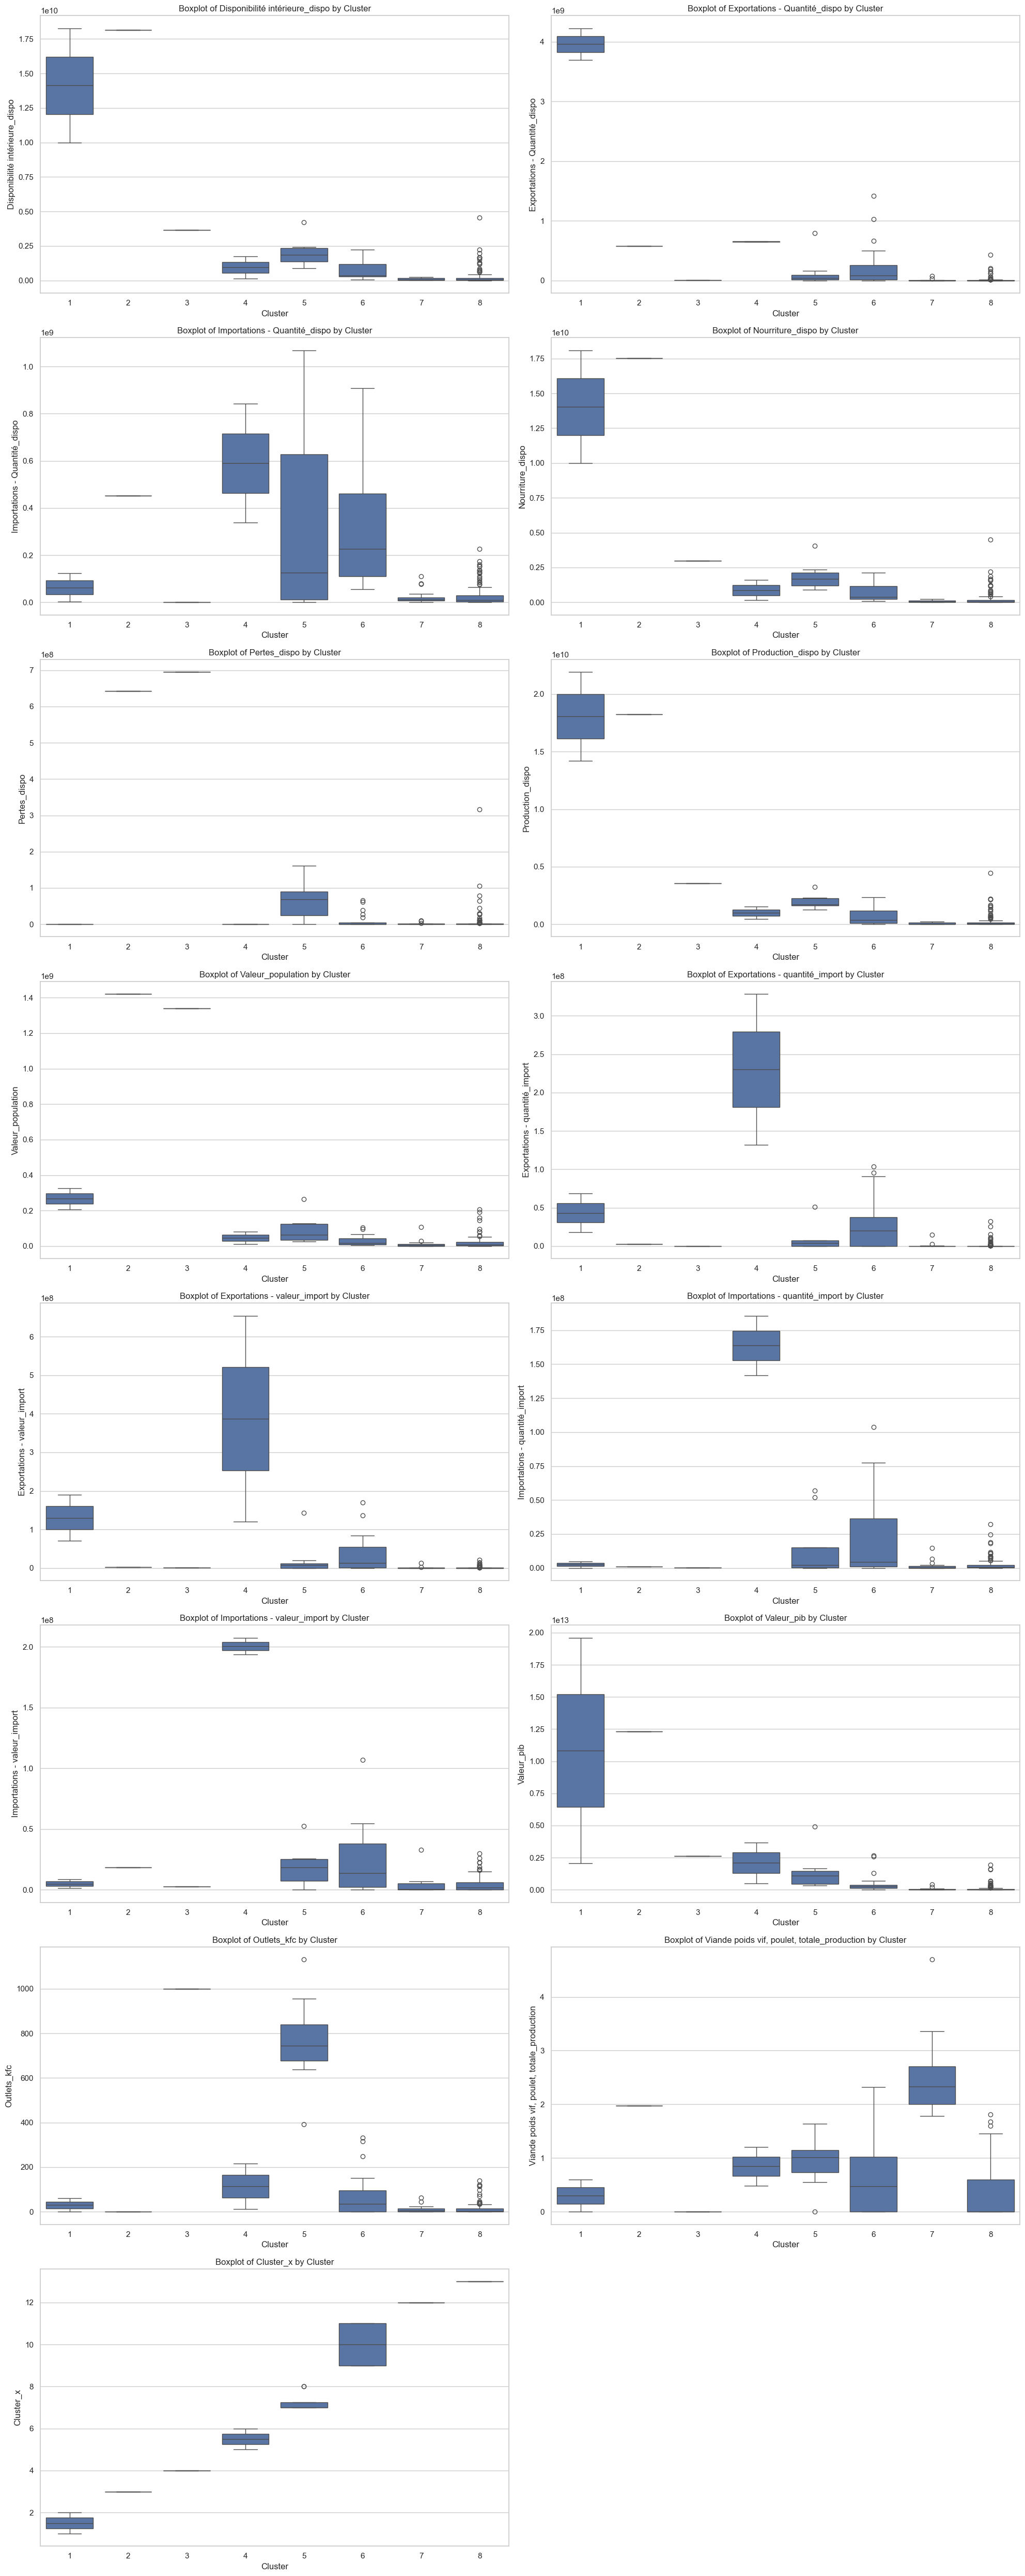

In [82]:
# comparison des clusters with boxplots 
plt.figure(figsize=(20, 50))
sns.set(style="whitegrid")
# variables à visualiser
variables = df_groupes_cah.drop(columns=['Zone', 'Cluster']).columns
# boxplot pour chaque variable
for i in range(len(variables)):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x='Cluster', y=variables[i], data=df_groupes_cah)
    plt.title(f'Boxplot of {variables[i]} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variables[i])
    plt.tight_layout()
plt.show()

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

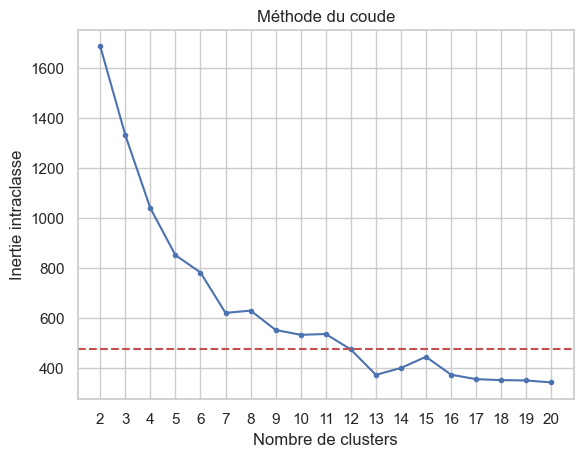

In [83]:
# Initialise les variables
n_clusters_range = range(2, 21)
inertias=[]

# Calcul l'inertie pour chaque valeur du nombre de clusters
for n_clusters in n_clusters_range:
    clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random',
                      random_state=0)
    clustering = clustering.fit(X_scaled)
    inertias.append(clustering.inertia_)

# Trace le graphique
fig, ax = plt.subplots()

plt.plot(n_clusters_range, inertias, marker='.')
plt.axhline(y=inertias[10], linestyle = '--', color='r')

# Définit la position des graduations
ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Inertie intraclasse')
ax.set_title('Méthode du coude')

plt.show()

del n_clusters_range, inertias, n_clusters, clustering, fig, ax

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

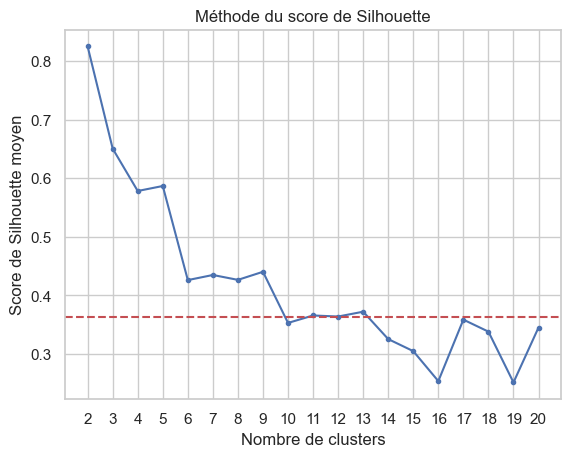

In [84]:
# Initialise les variables
n_clusters_range = range(2, 21)
silhouette_avg_scores = []

# Calcule le score de Silhouette moyen pour chaque nombre de clusters
for n_clusters in n_clusters_range:
    clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random',
                      random_state=0)
    clustering = clustering.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clustering.labels_)
    silhouette_avg_scores.append(silhouette_avg)

# Trace le graphique
fig, ax = plt.subplots()

plt.plot(n_clusters_range, silhouette_avg_scores, marker='.')
plt.axhline(y=silhouette_avg_scores[10], linestyle = '--', color='r')

# Définit la position des graduations
ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Score de Silhouette moyen')
ax.set_title('Méthode du score de Silhouette')

plt.show()

del (n_clusters_range, silhouette_avg_scores, n_clusters, clustering,
     silhouette_avg, fig, ax)

In [85]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(X_scaled)
# add cluster labels to the original dataset
df_groupes_kmeans = pd.DataFrame({'Zone': dataset.index, 'Cluster_y': kmeans.labels_})
df_groupes_kmeans = pd.merge(dataset, df_groupes_kmeans, on='Zone')
# mean values of each cluster without the cluster column zone
cluster_means_kmeans = df_groupes_kmeans.drop(columns=['Zone']).groupby('Cluster_y').mean()
print(cluster_means_kmeans)

           Disponibilité intérieure_dispo  Exportations - Quantité_dispo  \
Cluster_y                                                                  
0                            2.617182e+08                   1.433636e+07   
1                            1.826600e+10                   3.692000e+09   
2                            1.739000e+09                   6.460000e+08   
3                            1.754833e+09                   1.591667e+08   
4                            1.816100e+10                   5.760000e+08   
5                            1.099355e+08                   4.838710e+06   
6                            9.982000e+09                   4.223000e+09   
7                            6.540000e+08                   8.405000e+08   
8                            5.160000e+08                   1.842000e+08   
9                            1.491667e+09                   1.445000e+08   
10                           3.661000e+09                   4.000000e+06   
11          

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [86]:
# count of countries in each cluster
cluster_counts_kmeans = df_groupes_kmeans['Cluster_y'].value_counts().sort_index()
cluster_counts_kmeans 

Cluster_y
0     110
1       1
2       1
3       6
4       1
5      31
6       1
7       2
8       5
9       6
10      1
11      7
Name: count, dtype: int64

c:\Users\ruben\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\ruben\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\ruben\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\ruben\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\ruben\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\ruben\anaco

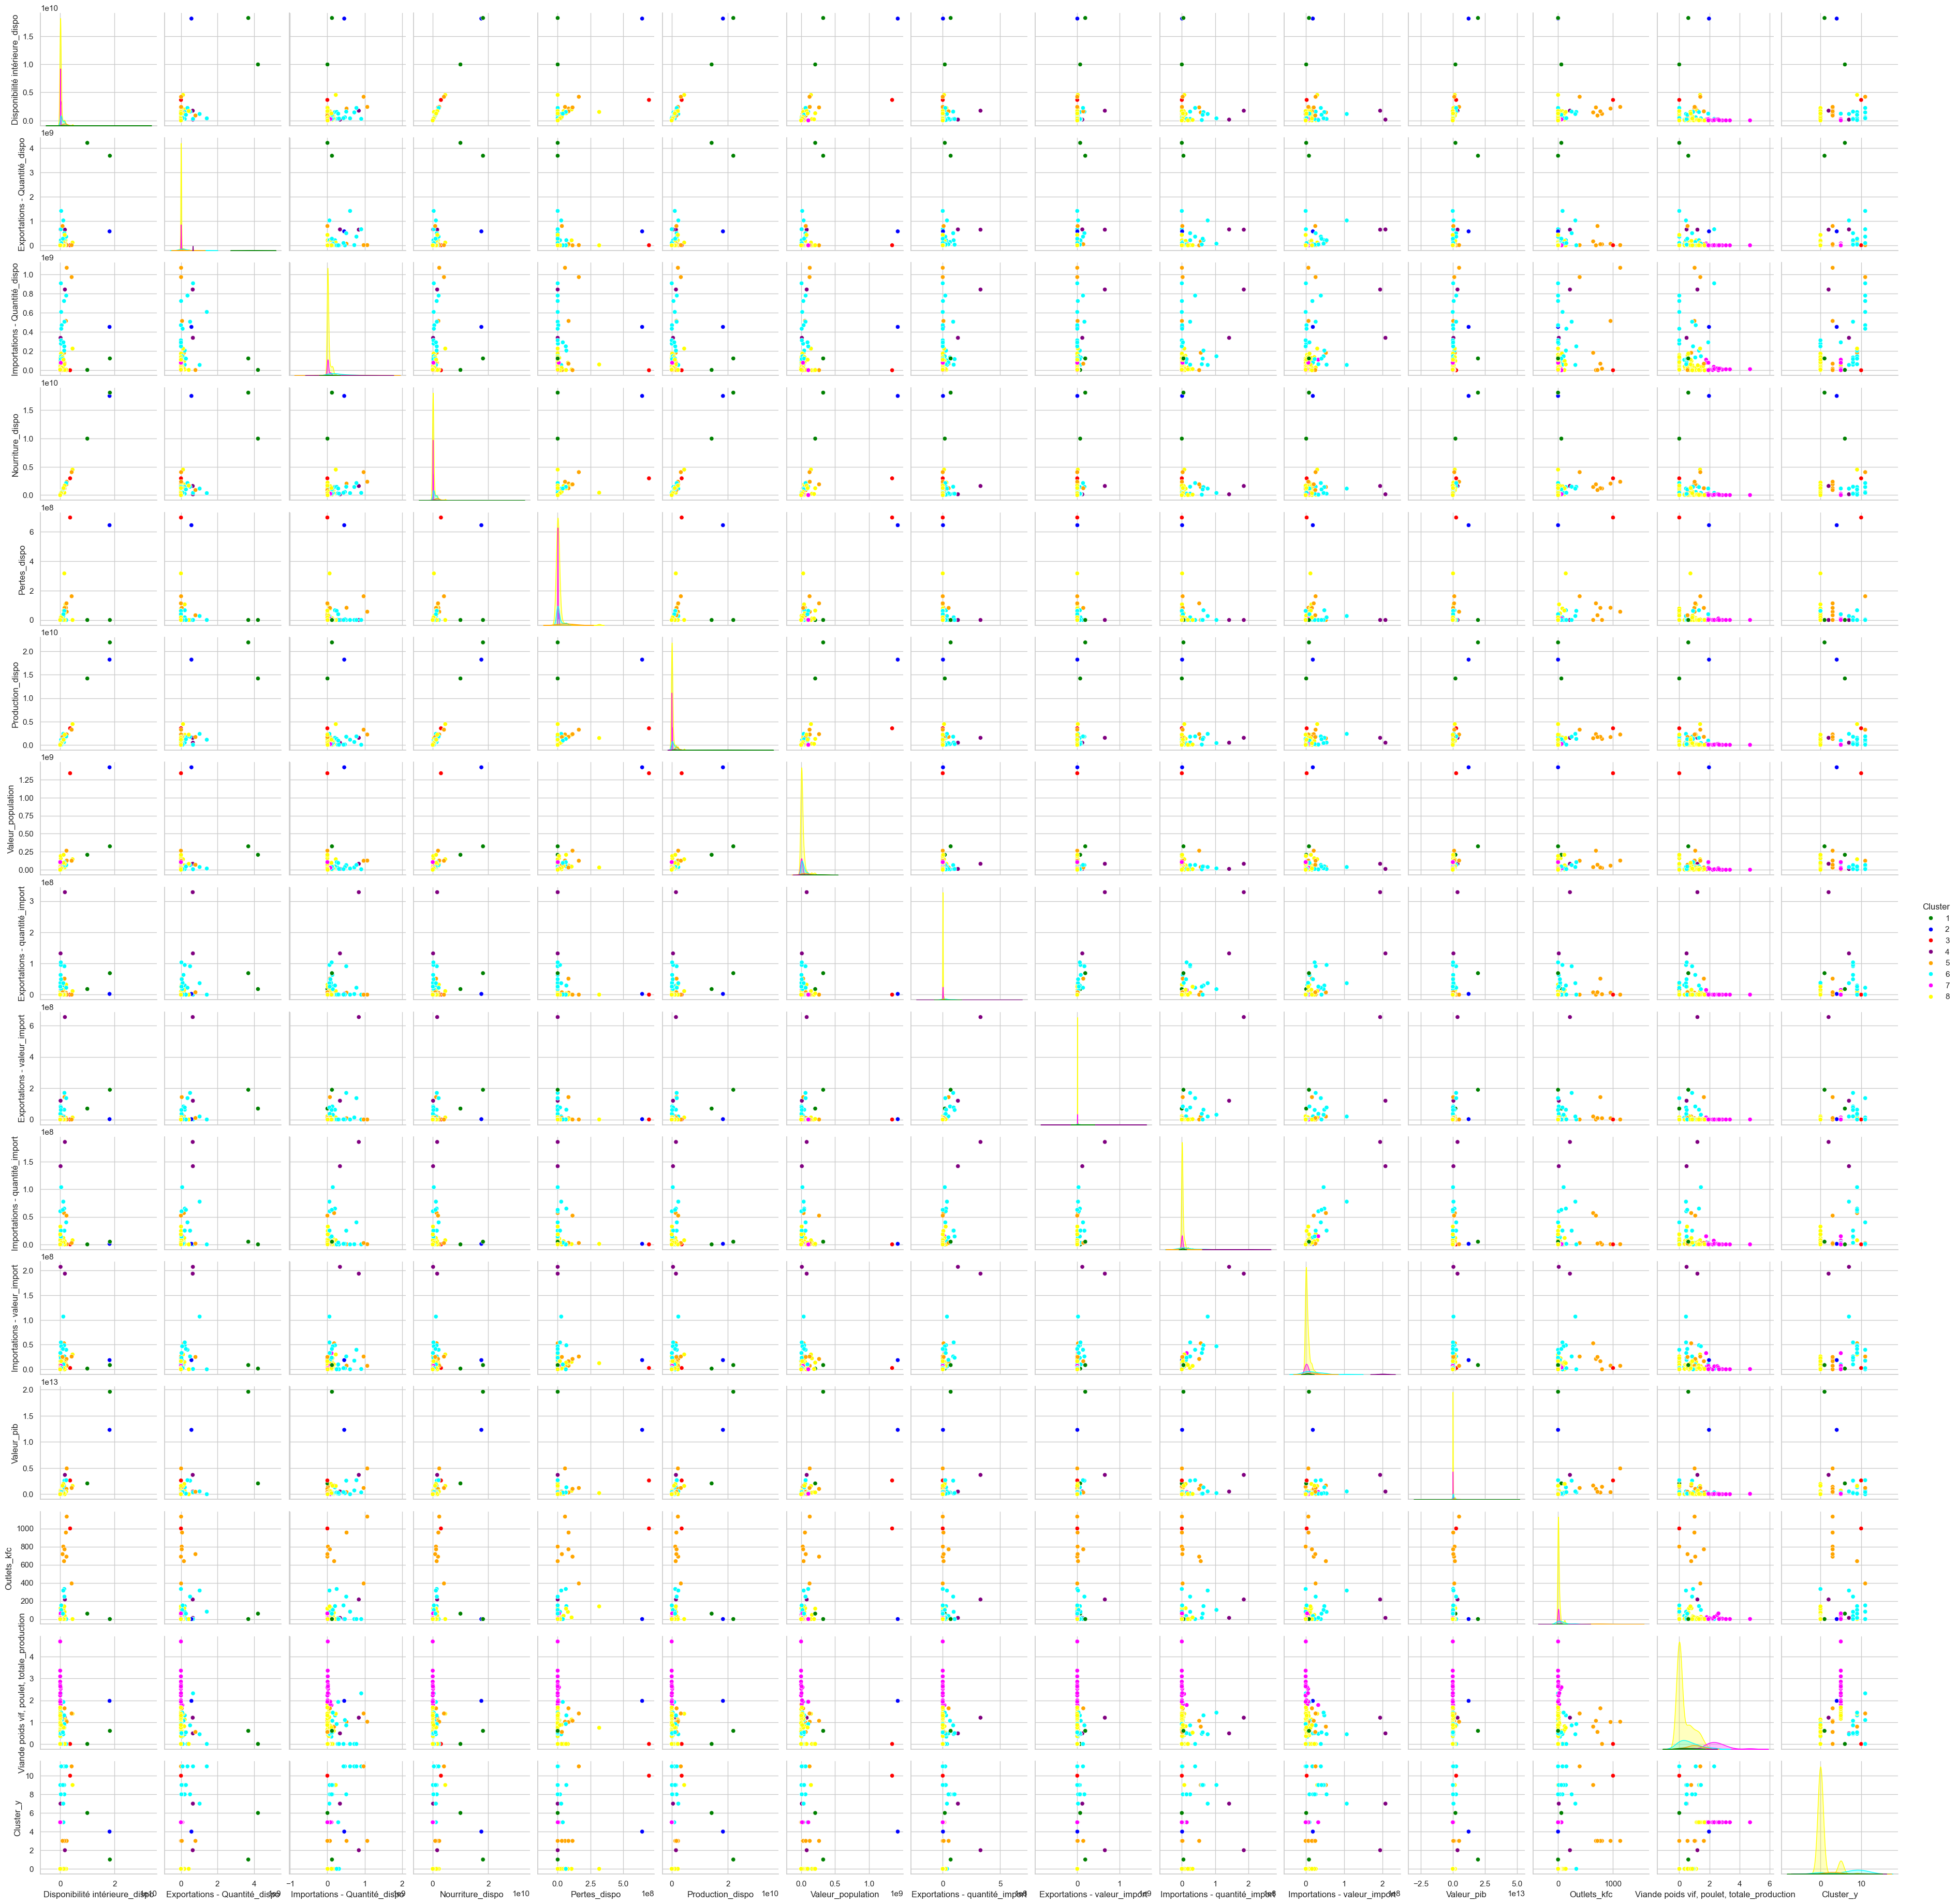

In [87]:


# Define your custom color palette
custom_palette = ["green", "blue", "red", "purple", "orange", "cyan", "magenta", "yellow", "brown", "pink", "gray", "lightblue"]

# Create the pair plot with your custom colors
sns.pairplot(df_groupes_kmeans, hue="Cluster", palette=custom_palette)


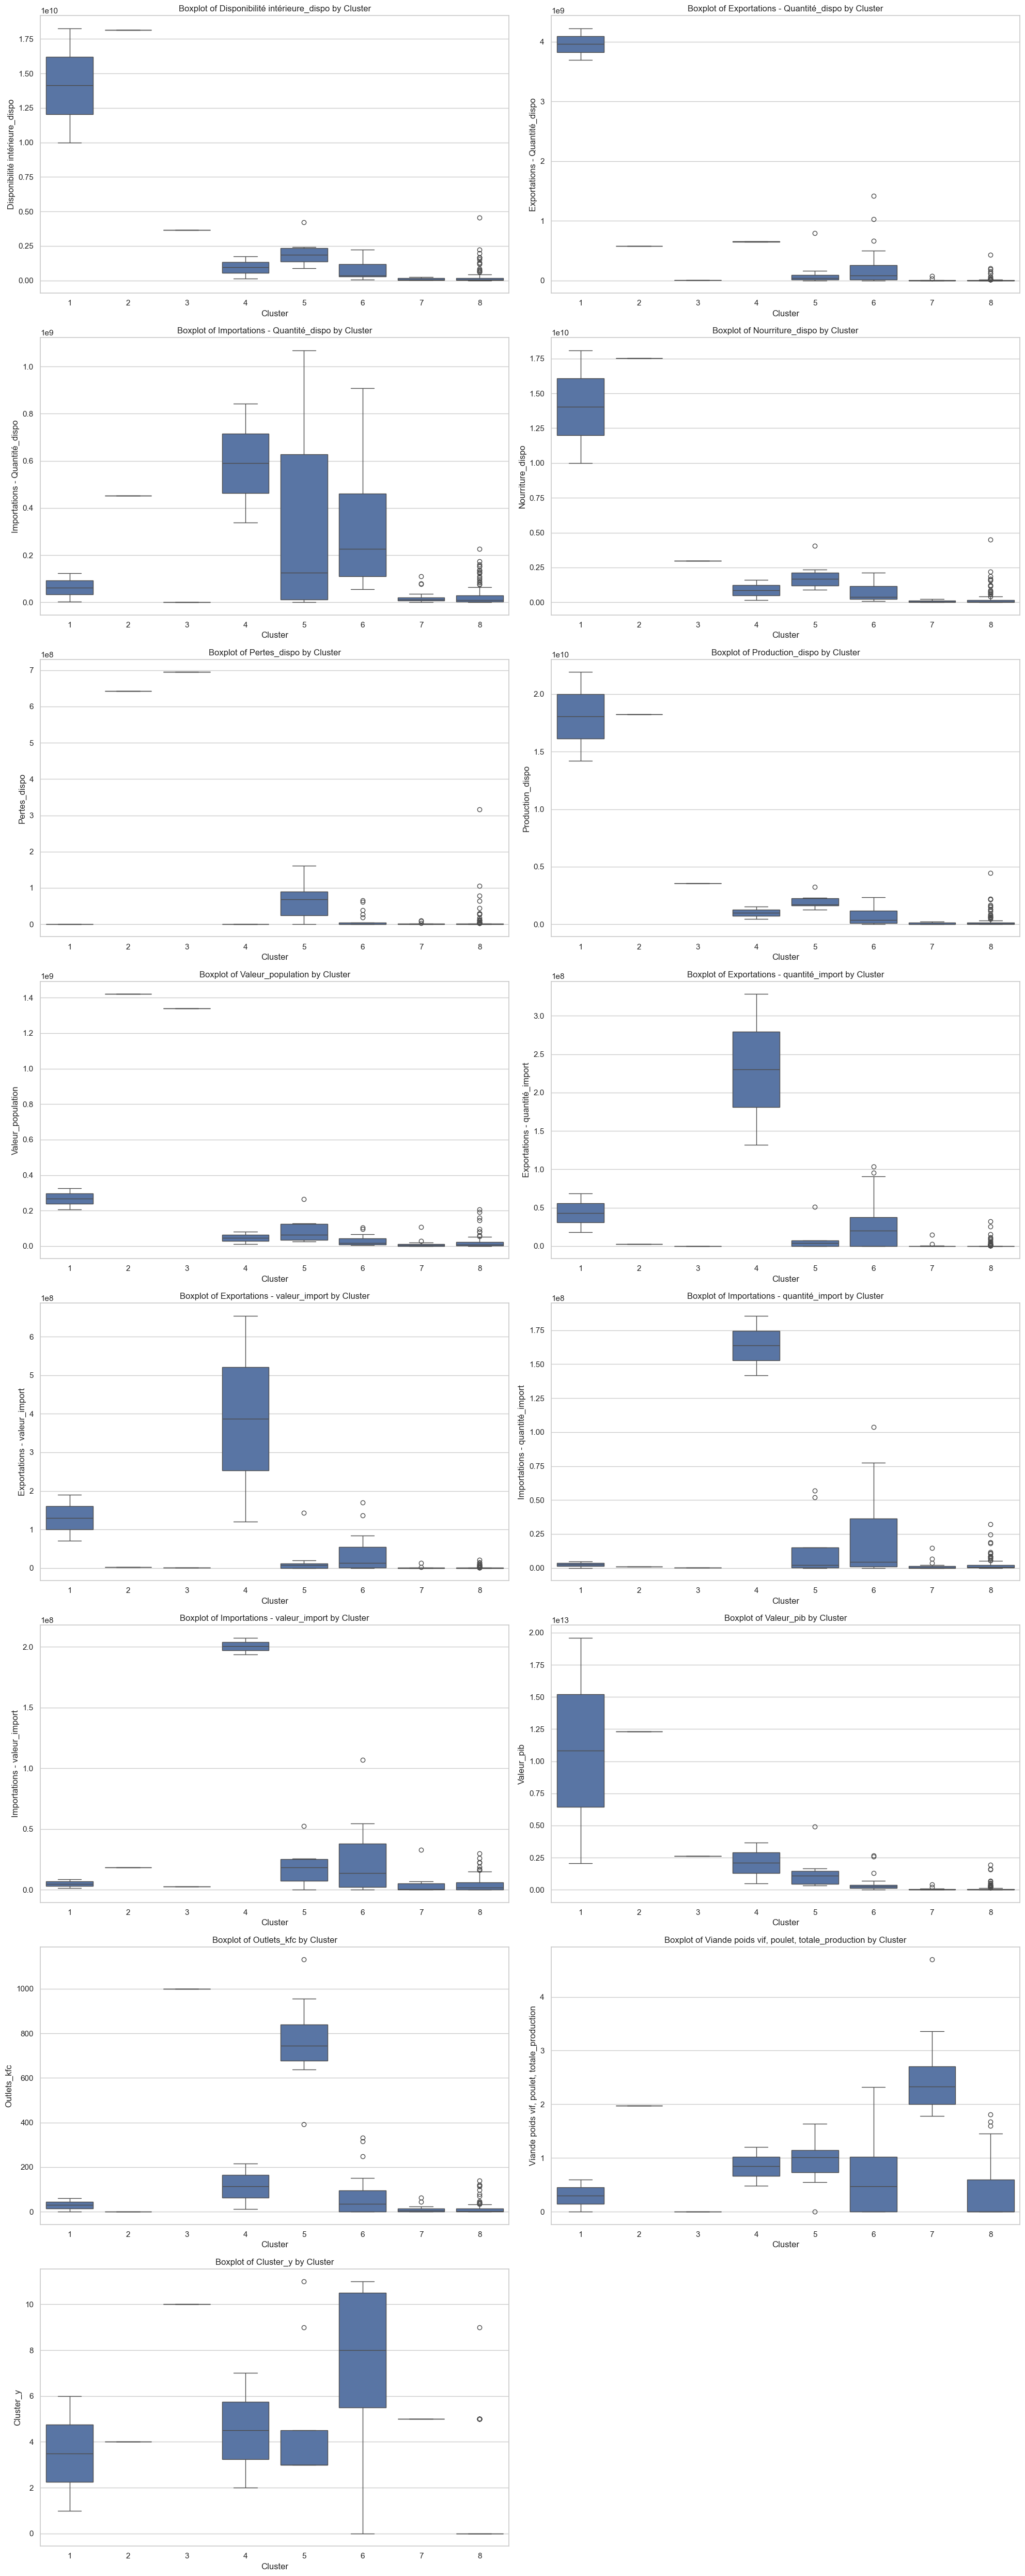

In [88]:
# boxplot for each variable
plt.figure(figsize=(20, 50))
variables = df_groupes_kmeans.drop(columns=['Zone', 'Cluster']).columns
for variable in variables:
    plt.subplot(8, 2, variables.tolist().index(variable) + 1)
    sns.boxplot(x='Cluster', y=variable, data=df_groupes_kmeans)
    plt.title(f'Boxplot of {variable} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.tight_layout()
plt.show()

## Analyse ACP


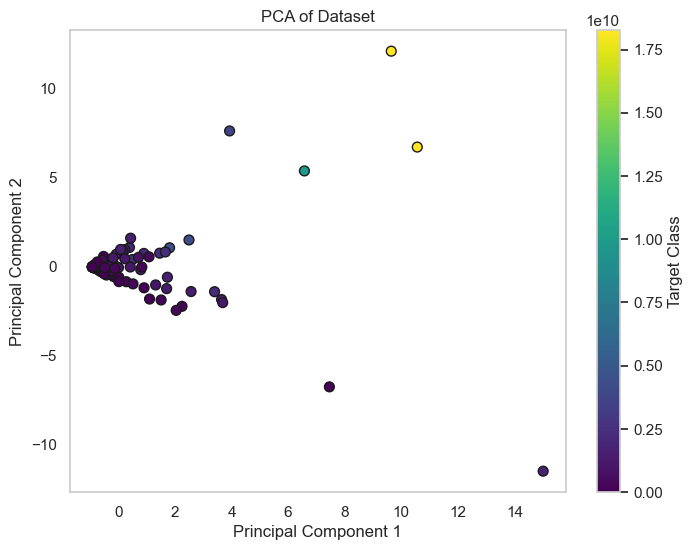

In [89]:
# Acp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, 1:11].values
# Standardization of the data
sc = StandardScaler()
X_std = sc.fit_transform(X)
# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)
# Explained variance
explained_variance = pca.explained_variance_ratio_
# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['Disponibilité intérieure_dispo'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.grid()
plt.show()
